In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.express as px

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load worldbank transposed's dataset
df_raw_worldbank_transposed = pd.read_csv('output/dataset_worldbank_transposed.csv')
df_raw_worldbank_transposed.head(3)

,Country Name,Year,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Community health workers (per 1,000 people)",...,Forest area (% of land area),Forest area (sq. km),Land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km)
0,Aruba,1960,50.776,27525.0,NaN,54208.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,1961,50.761,28139.0,2.206183,55434.0,2.236462,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0
2,Aruba,1962,50.746,28537.0,1.404498,56234.0,1.432843,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,11.111111,20.0


In [3]:
# Load worldbank's dataset
df_raw_worldbank = pd.read_csv('dataset/worldbank/API.csv')
df_raw_worldbank.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.70000,...,42.940000,42.957000,42.990000,43.041000,43.10800,43.192000,43.293000,43.41100,43.546000,43.697000
1,Aruba,ABW,Urban population,SP.URB.TOTL,27525.000,28139.000000,28537.000000,28763.000000,28922.000000,29080.00000,...,43820.000000,44059.000000,44351.000000,44666.000000,44978.00000,45293.000000,45614.000000,45949.00000,46294.000000,46654.000000
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.206183,1.404498,0.788835,0.551271,0.54481,...,0.100461,0.543931,0.660561,0.707733,0.69609,0.697901,0.706219,0.73174,0.748028,0.774631


## Simple EDA

Below EDA are inspired by Ryan's EDA

In [8]:
fig = px.line(df_raw_worldbank_transposed, 
              x="Year", 
              y="CO2 emissions (kt)", 
              color='Country Name')
fig.show()

In [12]:
fig = px.scatter(df_raw_worldbank_transposed,
                 x="Year", 
                 y="Nitrous oxide emissions (% change from 1990)", 
                 color='Country Name')
fig.show()

## Correlation

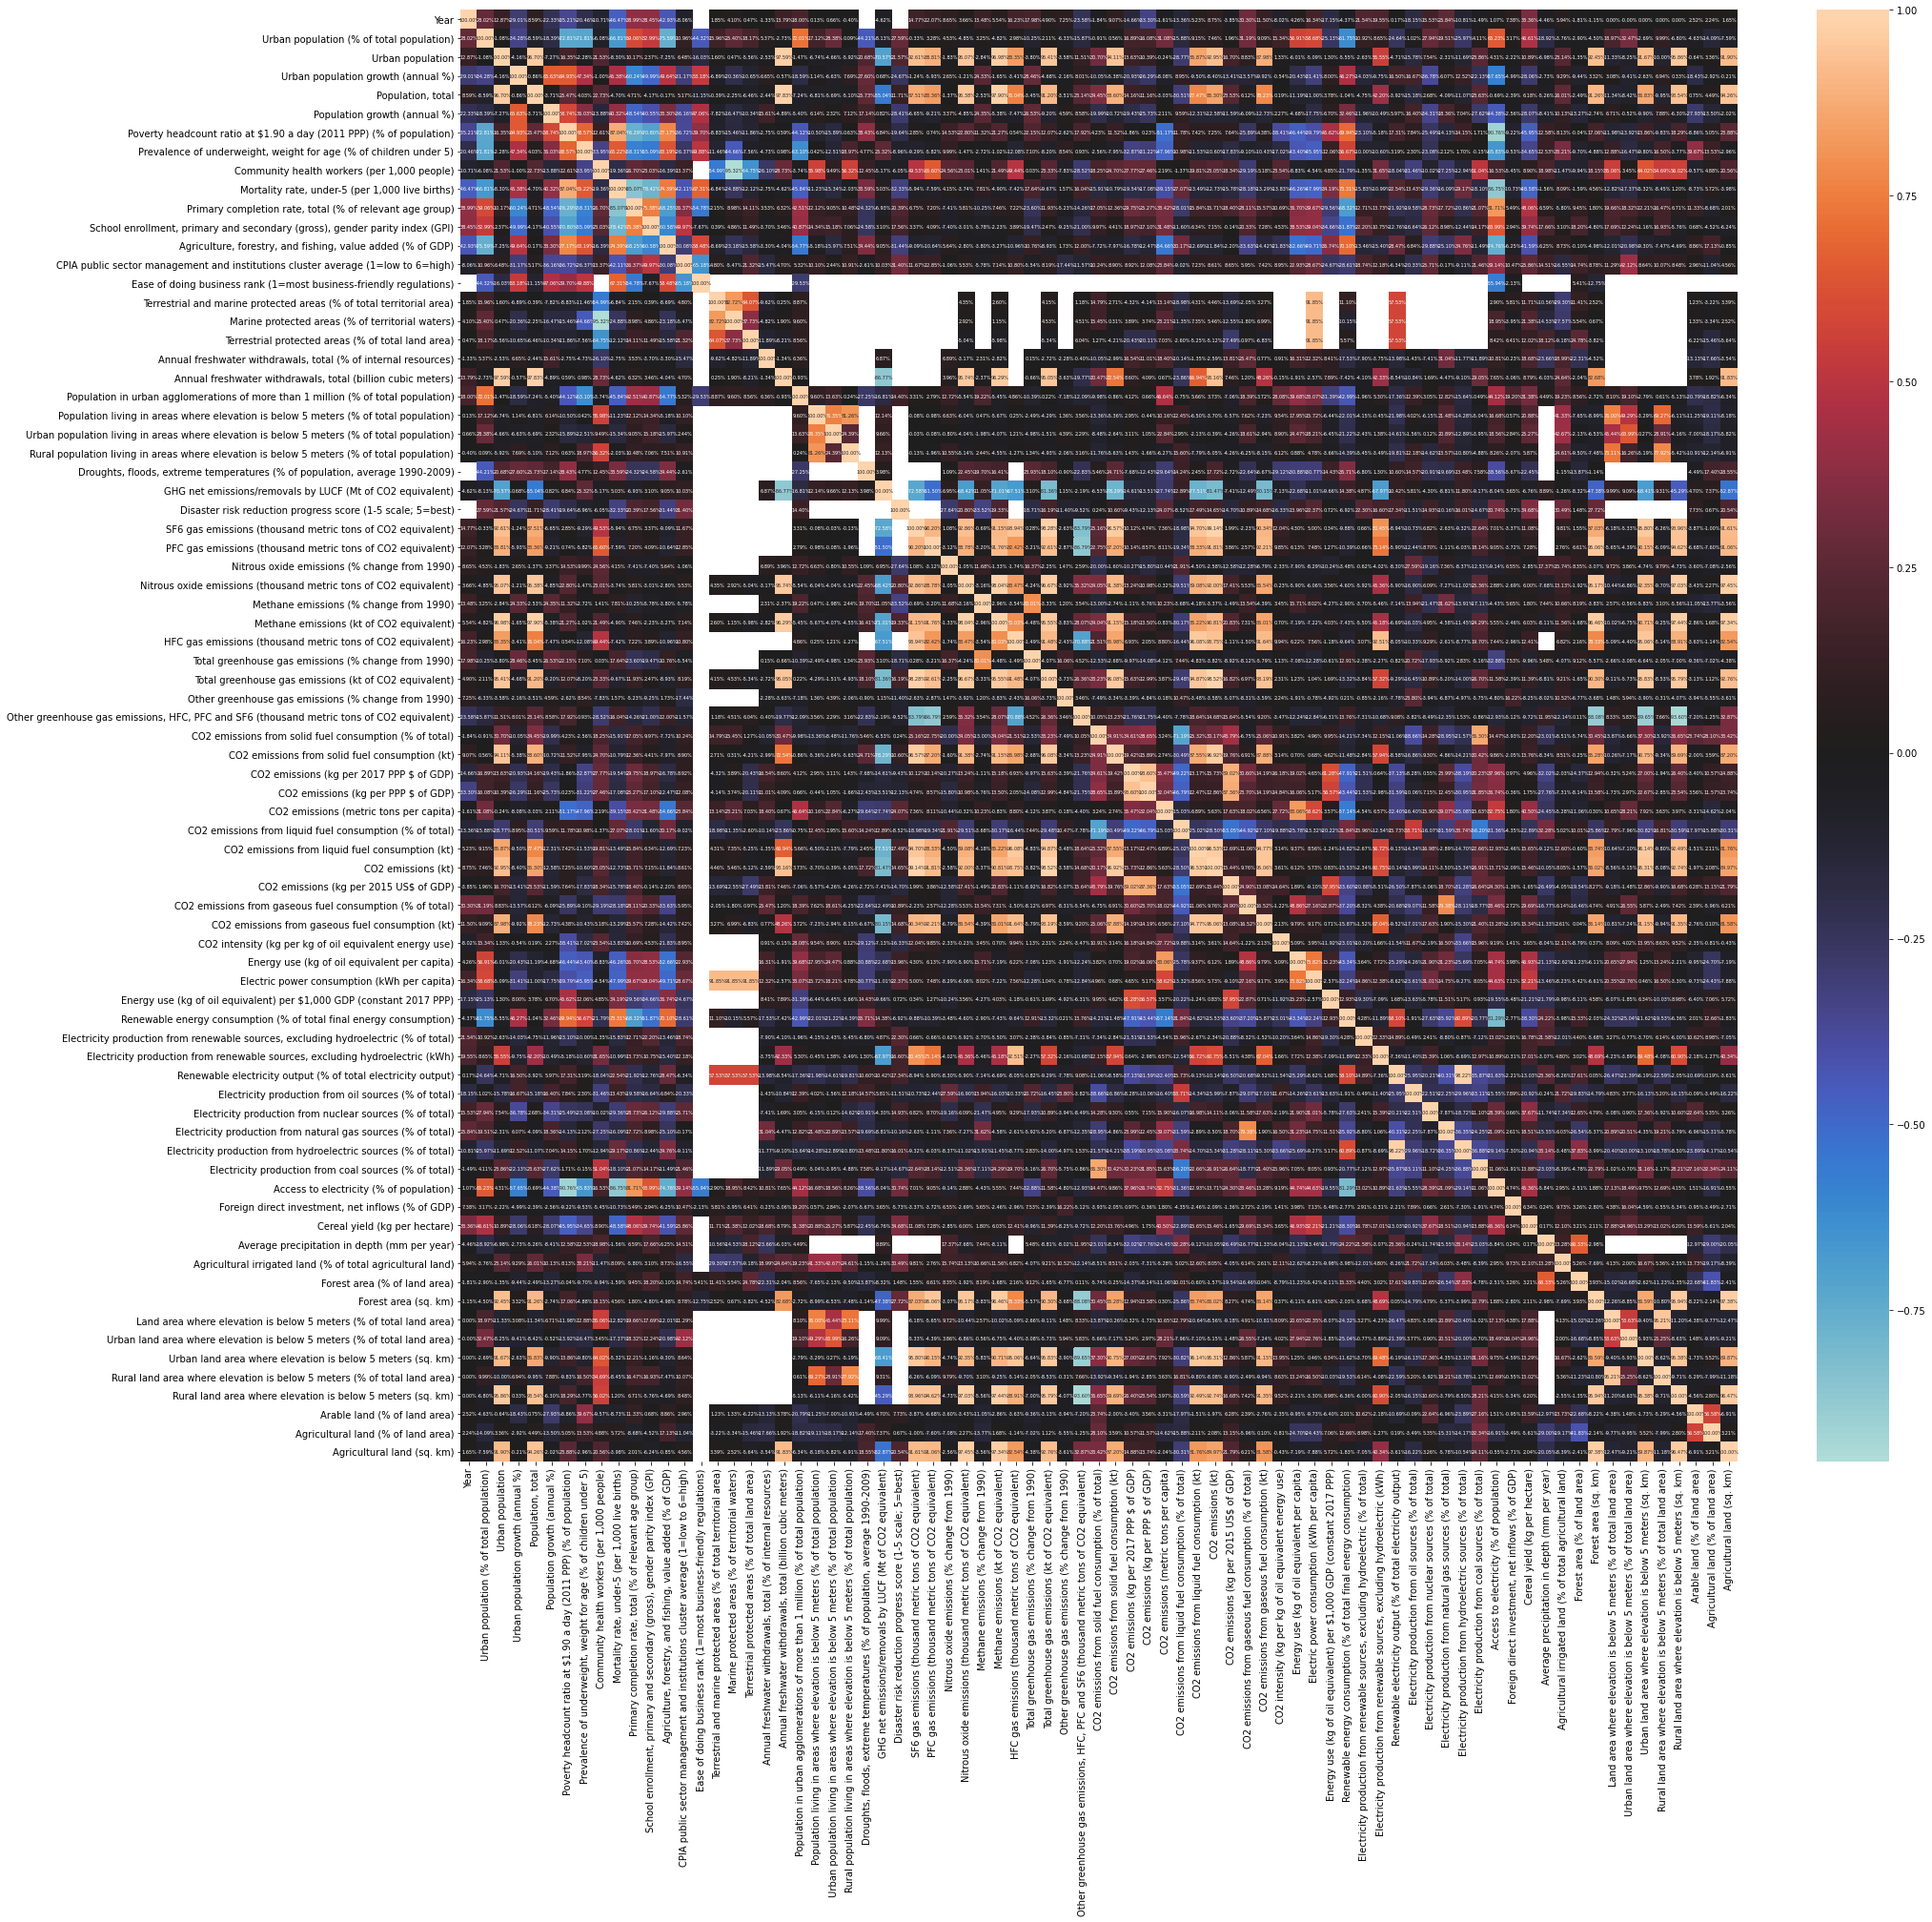

In [14]:
plt.figure(figsize=(30, 28))
hm = sns.heatmap(df_raw_worldbank_transposed.corr(),
                 center=0,
                 annot=True,
                 annot_kws={"size": 5},
                 fmt=".2%")